#Ejemplo 


si se tiene un sistema que quiere convertir el valor de grados
Fahrenheit conociendo los grados Celcius
Para
ello, se pueden ingresar un conjunto de datos de C y sus respectivos F
El sistema aprenderá la relación que existe y ajustará automáticamente el
peso y el sesgo, para hacer las predicciones

#Importar librerias

In [20]:
import numpy as np
import tensorflow as tf

In [25]:
celsius = np.array([-40, -20, -10, 0, 10, 15, 20, 25, 30, 35], dtype=float)
fahrenheit = np.array([-40, -4, 14, 32, 50, 59, 68, 77, 86, 95], dtype=float)


#Crear modelo de RED NEURONAL

Las capas densas son las que tienen conexiones de todas las neuronas a todas las demás. Las units son unidades o neuronas de la capa de salida. Las input_shpae son unidades o neuronas de la capa de entrada.


In [27]:

capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

#copilar el modelo:
El modelo adam permite ajustar pesos y sesgos de manera eficiente
de manera progresiva
el parametro del modelo adam es la tasa de aprendizaje
loss => funcion de perdida


In [28]:

modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')


#entrenar el modelo
epochs => vueltas que dara la red (prueba y error)
verbose=false  => no imprime tanta informacion

In [30]:
data_train = modelo.fit(celcius, fahrenheit, epochs=1000, verbose=False)
print('Modelo entrenado')
#Para saber cuando acaba

Modelo entrenado



#Imprimir función de perdida

Permite saber qué tan mal se encuentra en cada vuelta que dió


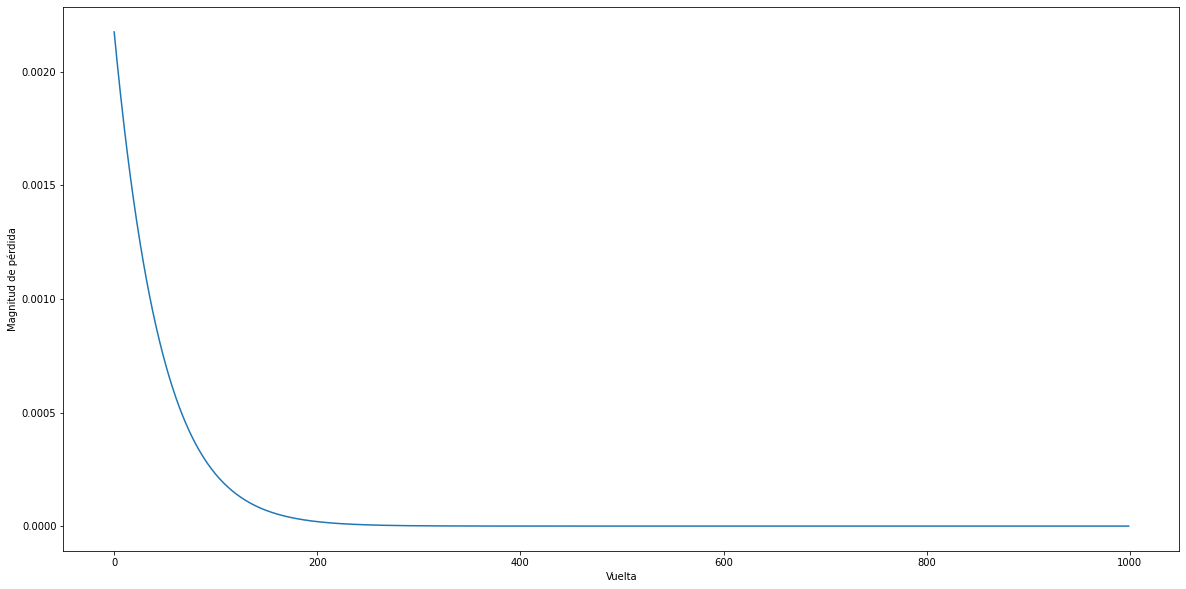

In [31]:
import matplotlib.pyplot as plt

def perdida():
    fig, ax = plt.subplots(figsize = (20, 10))

    plt.xlabel('Vuelta')
    plt.ylabel('Magnitud de pérdida')
    plt.plot(data_train.history['loss'])

perdida()



Se aprecia qu la pérdida de datos disminuye en cada vuelta, es decir que va mejorando y se estabiliza a partir de las 350 vueltas aproximadamente.


#Predecir

In [45]:
def predecir():
    print(''.ljust(20, '-'), end='Predicciones'.ljust(30, '-'))
    y_pred = modelo.predict([100])
    print(f'El resultado es {y_pred} °F')

predecir()

--------------------Predicciones------------------El resultado es [[212.]] °F


Se predice el resultado con una entrada de $100°C$. Este valor no está en los datos de entrenamiento. El modelo obtuvo el valor de $212.000601$. Al contrastar con un conversor o aplicando la fórmula, se tiene que $100°C$ equivalen a $212°F$, lo cual demuestra que el modelo funciona muy bien y proporciona predicciones muy aproximadas.

In [33]:
print('Peso y sesgo: ', capa.get_weights())

Peso y sesgo:  [array([[1.8000005]], dtype=float32), array([31.99995], dtype=float32)]




Acá se obtiene que el valor del peso es $1.8003926$, y el sesgo es de $31.920828$. Si comparamos esta información con la fórmula de conversión, apreciamos que tienen mucho en común:
$$ °F = 1.8 * °C + 32 $$

Esta fórmula la predijo el modelo, aprendiendo con el entrenamiento.


#Experimentar con más capas y más neuronas

In [34]:
oculta1 = tf.keras.layers.Dense(units = 4, input_shape = [1])
oculta2 = tf.keras.layers.Dense(units = 4)
salida = tf.keras.layers.Dense(units = 1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [35]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

En este caso agreagmos 2 capas ocultas (intermedias) con 4 neuronas cada una.

In [46]:
data_train = modelo.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('Modelo Entrenado')

Modelo Entrenado


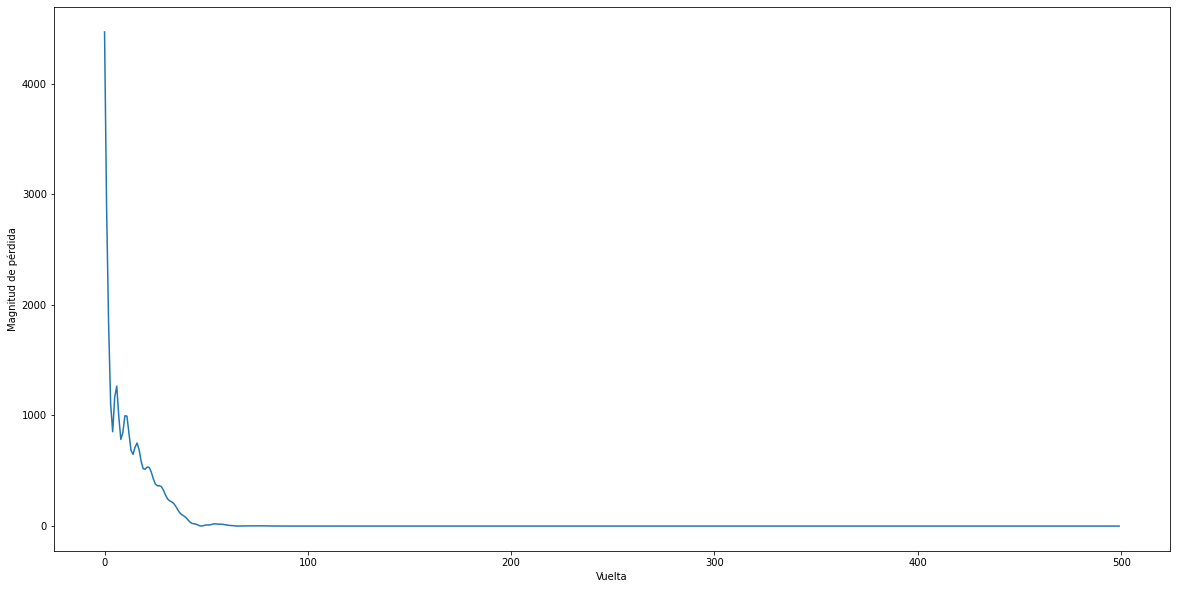

In [37]:
perdida()

En este caso se aprecia que la pérdida se estabilizo antes de las 100 vueltas. Esto indica que con más capas se logra una mejor eficiencia más rápido.

In [38]:
predecir()

--------------------Predicciones------------------El resultado es [[212.]] °F


In [39]:
print('Peso y sesgo: ', salida.get_weights())

Peso y sesgo:  [array([[-0.57152593],
       [-1.2270539 ],
       [ 0.30284402],
       [ 0.7328945 ]], dtype=float32), array([4.0213175], dtype=float32)]




En este caso los valores que se obtienen de peso (4 neuronas) y sesgo no son tán faciles de entender. Pero por la predicción podemos entender que fue un buen modelo.
